In [2]:
%pip install catboost
%pip install xgboost
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import numpy as np

In [2]:
# --- LOAD DATA ---
try:
    df = pd.read_csv('spotify_cleaned.csv')
 
    print("File loaded successfully.")
    df['pop_bucket']=df['pop_bucket'].apply(lambda x:x-1)
    # Bucket 'popularity'
    # df['popularity_bucket'] = pd.cut(
    #     df['popularity'],
    #     bins=[-1,0,40,60,85],
    #     labels=[1, 2, 3, 4]
    # ).astype(int)

    # print("Bucketing completed. Here's a sample:")
    # print(df[['popularity', 'popularity_bucket']].head())
    print(df.head(5))
except FileNotFoundError:
    print("Error: File 'spotify_cleaned.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: 'spotify_cleaned.csv' is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse 'spotify_cleaned.csv'. Check file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

File loaded successfully.
   Unnamed: 0.1  Unnamed: 0          artist_name         track_name  \
0          1044        1044  Menahan Street Band  Seven Is the Wind   
1       1130163     1424053            Flatsound         We'll Live   
2        927251     1121151              Subhira      Ruta del Inca   
3        275932      275932        Scary Pockets         Wonderwall   
4        834627      981623    Pain of Salvation        Iter Impius   

                 track_id  popularity  year     genre  danceability  energy  \
0  5qh2fad21W9se0d4IpKcyi          22  2012  afrobeat         0.525   0.577   
1  1XuAT2hAkjDvGqd4MMv2wL          16  2011       emo         0.339   0.624   
2  0ID7odbzAGY7C9cP2PzLRX           0  2007  afrobeat         0.552   0.766   
3  120tmueqvWTGdHET4u5sPP          36  2017      funk         0.756   0.732   
4  12kxpEvK9B99z02rNRmnSF          26  2004   swedish         0.437   0.584   

   ...  speechiness  acousticness  instrumentalness  liveness  valence  

Use a tree model like XGBoost. Better for tabular data and known features.

In [7]:
df=pd.get_dummies(df.drop(columns=['Unnamed: 0.1','Unnamed: 0','artist_name','track_name','track_id']))

In [8]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

Starting run 1
Starting run 2
Starting run 3
Starting run 4
Starting run 5
Starting run 6
Starting run 7
Starting run 8
Starting run 9
Starting run 10
Categorical columns encoded: []

Training Random Forest...
Pred Proba: [[0.005  0.0125 0.1475 0.835 ]
 [0.     0.11   0.69   0.2   ]
 [0.     0.02   0.495  0.485 ]
 ...
 [0.     0.005  0.165  0.83  ]
 [0.     0.035  0.3925 0.5725]
 [0.     0.0275 0.385  0.5875]]
name: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.71      0.10      0.17       178
           2       0.70      0.66      0.68      1409
           3       0.81      0.89      0.85      2411

    accuracy                           0.77      4000
   macro avg       0.55      0.41      0.42      4000
weighted avg       0.77      0.77      0.76      4000



C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

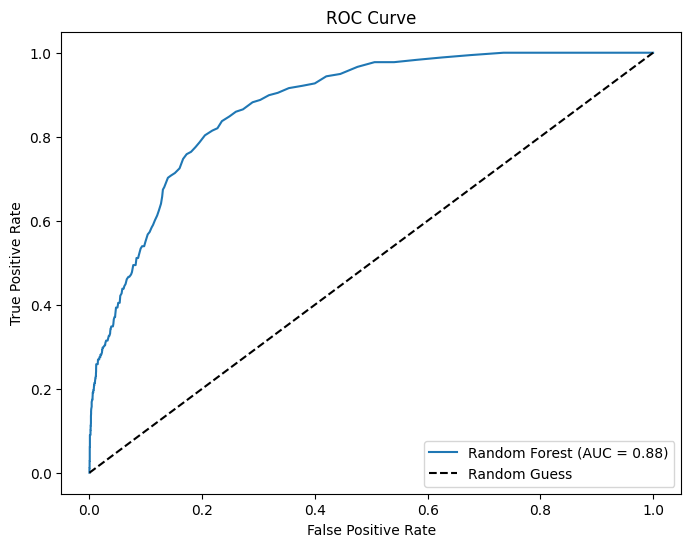


Feature Importances:
year: 0.0773
duration_ms: 0.0684
danceability: 0.0613
acousticness: 0.0594
loudness: 0.0591
instrumentalness: 0.0581
energy: 0.0572
speechiness: 0.0544
valence: 0.0535
tempo: 0.0525
liveness: 0.0524
key: 0.0342
genre_pop: 0.0232
genre_dance: 0.0230
decade_2020s: 0.0211
genre_hip-hop: 0.0209
decade_2000s: 0.0202
genre_alt-rock: 0.0169
mode: 0.0108
genre_indie-pop: 0.0096
decade_2010s: 0.0080
time_signature: 0.0074
genre_folk: 0.0065
genre_rock: 0.0062
genre_metal: 0.0059
genre_electro: 0.0058
genre_country: 0.0048
genre_french: 0.0048
genre_chill: 0.0046
genre_k-pop: 0.0042
genre_jazz: 0.0042
genre_edm: 0.0033
genre_soul: 0.0032
genre_dancehall: 0.0029
genre_emo: 0.0028
genre_german: 0.0027
genre_pop-film: 0.0027
genre_power-pop: 0.0026
genre_funk: 0.0026
genre_spanish: 0.0026
genre_comedy: 0.0024
genre_salsa: 0.0024
genre_samba: 0.0023
genre_gospel: 0.0023
genre_house: 0.0023
genre_tango: 0.0023
genre_sertanejo: 0.0022
genre_club: 0.0022
genre_sad: 0.0022
genre_fo

c:\Users\JoshL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:02:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pred Proba: [[1.9572082e-04 6.7923535e-03 1.3782082e-01 8.5519111e-01]
 [2.8281685e-05 1.7135128e-01 7.1259278e-01 1.1602762e-01]
 [1.4559483e-05 4.5489282e-03 8.3503270e-01 1.6040383e-01]
 ...
 [1.2991225e-05 5.5101779e-03 1.8031134e-01 8.1416553e-01]
 [1.5419073e-05 5.6462735e-03 6.6616350e-01 3.2817483e-01]
 [1.2783756e-05 3.4974439e-03 1.1370782e-01 8.8278192e-01]]
name: XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.15      0.23       178
           2       0.69      0.69      0.69      1409
           3       0.83      0.88      0.85      2411

    accuracy                           0.78      4000
   macro avg       0.51      0.43      0.44      4000
weighted avg       0.77      0.78      0.77      4000



C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

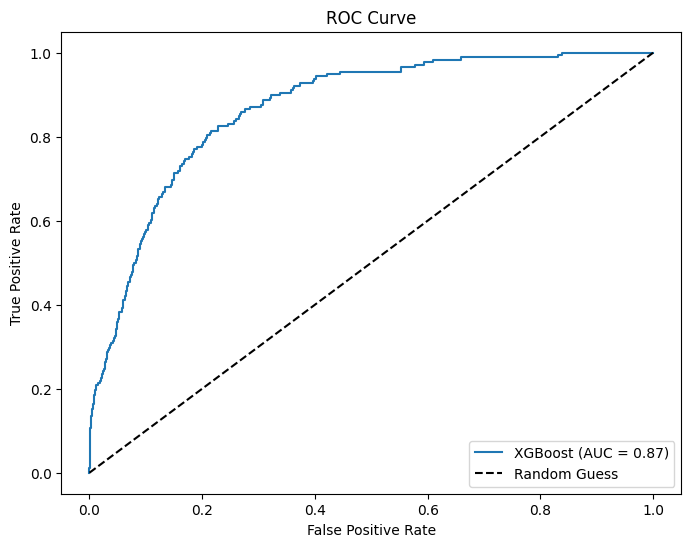


Feature Importances:
genre_hip-hop: 0.0550
genre_dance: 0.0470
genre_pop: 0.0453
genre_comedy: 0.0358
genre_alt-rock: 0.0299
genre_indie-pop: 0.0274
genre_chill: 0.0238
genre_french: 0.0230
genre_folk: 0.0224
genre_jazz: 0.0204
genre_rock: 0.0197
genre_tango: 0.0190
genre_soul: 0.0184
genre_power-pop: 0.0179
genre_electro: 0.0169
genre_rock-n-roll: 0.0169
genre_metal: 0.0167
year: 0.0164
genre_club: 0.0159
genre_k-pop: 0.0156
genre_edm: 0.0152
genre_country: 0.0152
genre_opera: 0.0138
genre_heavy-metal: 0.0113
genre_house: 0.0112
genre_ska: 0.0112
genre_sertanejo: 0.0107
genre_breakbeat: 0.0107
genre_sad: 0.0104
genre_guitar: 0.0104
genre_salsa: 0.0103
genre_dancehall: 0.0102
genre_samba: 0.0101
genre_german: 0.0098
instrumentalness: 0.0092
genre_black-metal: 0.0091
genre_party: 0.0088
genre_classical: 0.0083
genre_emo: 0.0082
genre_groove: 0.0079
genre_spanish: 0.0078
genre_forro: 0.0078
genre_grindcore: 0.0077
genre_afrobeat: 0.0076
genre_hardcore: 0.0076
genre_new-age: 0.0076
genre

C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

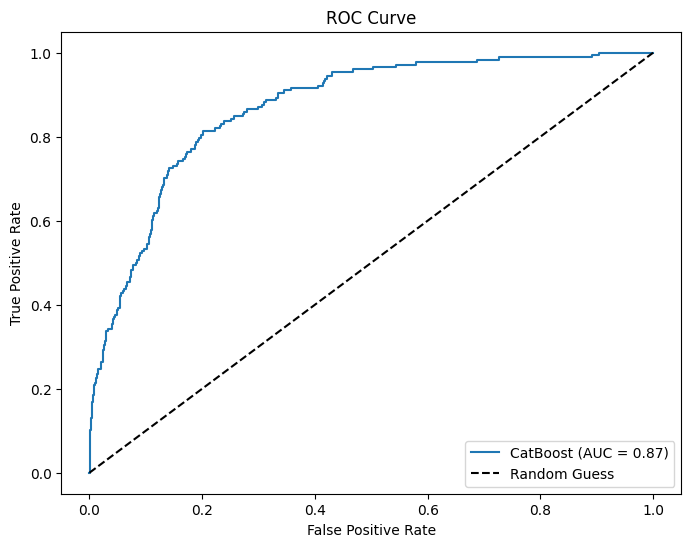


Feature Importances:
year: 13.6321
instrumentalness: 8.0968
duration_ms: 7.3439
loudness: 6.2694
speechiness: 6.1101
tempo: 6.0313
danceability: 5.9550
acousticness: 5.3614
liveness: 5.2685
valence: 5.1451
energy: 3.9920
key: 3.9063
genre_hip-hop: 2.3051
genre_dance: 2.2388
genre_pop: 2.2246
genre_alt-rock: 1.5195
decade_2010s: 1.4030
mode: 1.2767
decade_2020s: 1.2487
decade_2000s: 1.0207
genre_indie-pop: 0.8107
genre_country: 0.5834
genre_electro: 0.5826
genre_metal: 0.4870
genre_folk: 0.4857
genre_rock: 0.4452
genre_french: 0.4339
time_signature: 0.4249
genre_chill: 0.3589
genre_k-pop: 0.3348
genre_jazz: 0.3222
genre_dancehall: 0.2471
genre_soul: 0.2371
genre_edm: 0.2369
genre_german: 0.2034
genre_power-pop: 0.1692
genre_sad: 0.1650
genre_classical: 0.1642
genre_house: 0.1547
genre_emo: 0.1518
genre_sertanejo: 0.1479
genre_spanish: 0.1346
genre_salsa: 0.1317
genre_hardcore: 0.1261
genre_funk: 0.1242
genre_pop-film: 0.1235
genre_club: 0.1205
genre_forro: 0.1193
genre_cantopop: 0.1191

C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (stat

Pred Proba: [[1.13362933e-01 2.51353848e-01 3.30228639e-01 3.05054580e-01]
 [2.66440851e-01 3.27597421e-01 3.88643932e-01 1.73177963e-02]
 [5.99606887e-07 6.26065796e-02 4.69734723e-01 4.67658098e-01]
 ...
 [1.40878729e-07 2.01616276e-01 3.65951832e-01 4.32431752e-01]
 [1.94362702e-05 1.93896830e-01 4.29443366e-01 3.76640368e-01]
 [2.05648369e-06 1.65904209e-01 2.37329424e-01 5.96764311e-01]]
name: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.23      0.29      0.25       178
           2       0.60      0.62      0.61      1409
           3       0.84      0.78      0.81      2411

    accuracy                           0.70      4000
   macro avg       0.42      0.42      0.42      4000
weighted avg       0.73      0.70      0.71      4000



C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


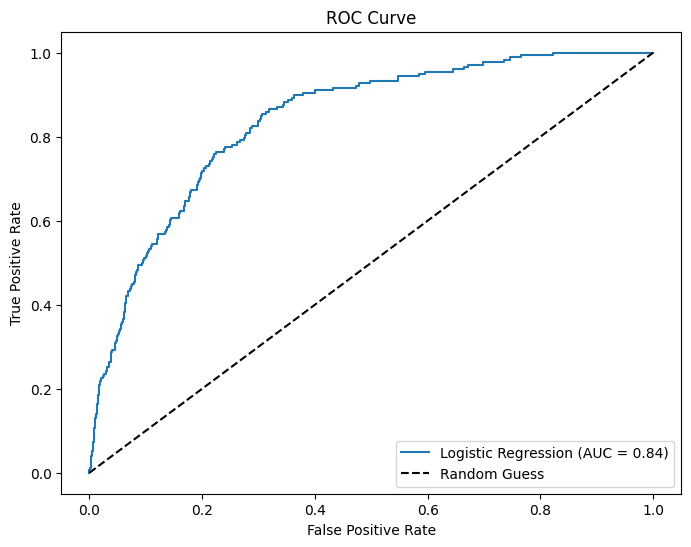


Feature Importances:
genre_garage: 11.2636
genre_country: 7.2250
decade_2000s: 6.6930
decade_2020s: 6.4075
genre_dance: 6.1609
instrumentalness: 5.6093
energy: 5.1007
genre_electro: 5.0157
speechiness: 1.9812
acousticness: 1.6761
time_signature: 1.3093
genre_hip-hop: 1.1965
danceability: 1.1409
genre_k-pop: 1.0494
genre_alt-rock: 0.9940
mode: 0.9742
valence: 0.9399
genre_sad: 0.8697
genre_chill: 0.7450
genre_indie-pop: 0.6699
liveness: 0.6581
genre_pop-film: 0.6581
genre_french: 0.6578
genre_gospel: 0.6480
genre_funk: 0.6374
genre_folk: 0.6331
genre_emo: 0.6057
genre_spanish: 0.6006
genre_pop: 0.5723
genre_sertanejo: 0.5439
genre_jazz: 0.5427
genre_dub: 0.5122
genre_metal: 0.5046
genre_dancehall: 0.4924
genre_soul: 0.4880
genre_acoustic: 0.4871
genre_indian: 0.4815
genre_blues: 0.4604
genre_german: 0.4499
genre_edm: 0.4487
genre_salsa: 0.4401
genre_death-metal: 0.4185
genre_black-metal: 0.4182
genre_singer-songwriter: 0.4139
genre_deep-house: 0.4056
genre_hardcore: 0.4011
genre_ambien

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# --- MODEL TRAINING ---
n_runs = 10
models = {
    "Random Forest": RandomForestClassifier(n_estimators=400, random_state=69),
    "XGBoost": xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=4,
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=69),
    "CatBoost": CatBoostClassifier(
        iterations=400,
        depth=8,
        learning_rate=0.1,
        loss_function='MultiClass',
        verbose=False,
        random_state=69),
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        multi_class='ovr',
        class_weight='balanced')
}
all_results = {model_name: [] for model_name in models.keys()}

for run in range(n_runs):
    print("Starting run", run + 1)
    df = df.sample(20000, random_state=run)

if 'df' in locals():
    try:
        X = df.drop(['popularity', 'pop_bucket'], axis=1)
        y = df['pop_bucket']

        # Identify and label encode categorical columns
        categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

        le = LabelEncoder()
        for col in categorical_cols:
            X[col] = le.fit_transform(X[col])

        print(f"Categorical columns encoded: {categorical_cols}")

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        results = {}

        # Train and evaluate
        for name, model in models.items():
            print(f"\nTraining {name}...")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)
            print(f"Pred Proba: {y_pred_proba}")
            acc = accuracy_score(y_test, y_pred)
            results[name] = acc
            all_results[name].append(acc)
            print("name:", name)

            print("Classification Report:")
            print(classification_report(y_test, y_pred))

            # --- ROC-AUC Curve ---
            try:
                fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)  # Adjust pos_label as needed
                roc_auc = auc(fpr, tpr)
                plt.figure(figsize=(8, 6))
                plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
                plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
                plt.xlabel("False Positive Rate")
                plt.ylabel("True Positive Rate")
                plt.title("ROC Curve")
                plt.legend(loc="lower right")
                plt.show()
            except Exception as e:
                print(f"An error occurred while plotting ROC-AUC for {name}: {e}")


            try:
                if hasattr(model, "feature_importances_"):
                    importances = model.feature_importances_
                elif hasattr(model, "coef_"):
                    importances = np.abs(model.coef_[0])  # For Logistic Regression
                else:
                    importances = None

                if importances is not None:
                    feature_importances = sorted(
                        zip(X_train.columns, importances), key=lambda x: x[1], reverse=True
                    )
                    print("\nFeature Importances:")
                    for feature, importance in feature_importances:
                        print(f"{feature}: {importance:.4f}")
                else:
                    print("Feature importances not available for this model.")
            except Exception as e:
                print(f"An error occurred while calculating feature importances: {e}")

    except KeyError as e:
        print(f"Error: Target column '{e}' not found in the DataFrame.")
    except Exception as e:
        print(f"An error occurred during model training or evaluation: {e}")

In [10]:
average_results = {name: np.mean(accs) for name, accs in all_results.items()}
avg_df = pd.DataFrame(average_results.items(), columns=["Model", "Average Accuracy"])
avg_df = avg_df.sort_values("Average Accuracy", ascending=False)

print("Average Accuracy for Each Model:")
print(avg_df)

Average Accuracy for Each Model:
                 Model  Average Accuracy
1              XGBoost            0.7770
2             CatBoost            0.7755
0        Random Forest            0.7735
3  Logistic Regression            0.7045


In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(label):
    # Initialize dictionaries to store data for combined plots
    roc_data = {}
    lift_data = {}

    # Train and evaluate
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)  # Get probabilities for ROC-AUC
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        all_results[name].append(acc)
        print("name:", name)

        #print("Classification Report:")
        #print(classification_report(y_test, y_pred))

        # --- Collect ROC-AUC Data ---
        try:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, label], pos_label=1)  # Adjust pos_label as needed
            roc_auc = auc(fpr, tpr)
            roc_data[name] = (fpr, tpr, roc_auc)
        except Exception as e:
            print(f"An error occurred while calculating ROC-AUC for {name}: {e}")

        # --- Collect Lift Curve Data ---
        try:
            sorted_indices = np.argsort(-y_pred_proba[:, 1])  # Sort by predicted probabilities
            sorted_y_test = y_test.iloc[sorted_indices]
            cumulative_gains = np.cumsum(sorted_y_test) / np.sum(sorted_y_test)
            lift_data[name] = cumulative_gains
        except Exception as e:
            print(f"An error occurred while calculating Lift Curve for {name}: {e}")

    # --- Plot Combined ROC-AUC Curve ---
    plt.figure(figsize=(10, 8))
    for name, (fpr, tpr, roc_auc) in roc_data.items():
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Combined ROC Curve")
    plt.legend(loc="lower right")
    plt.savefig(f"roc_auc_{label}.png")
    plt.show()


Training Random Forest...
name: Random Forest

Training XGBoost...


c:\Users\JoshL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:03:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


name: XGBoost

Training CatBoost...
name: CatBoost

Training Logistic Regression...


C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (stat

name: Logistic Regression


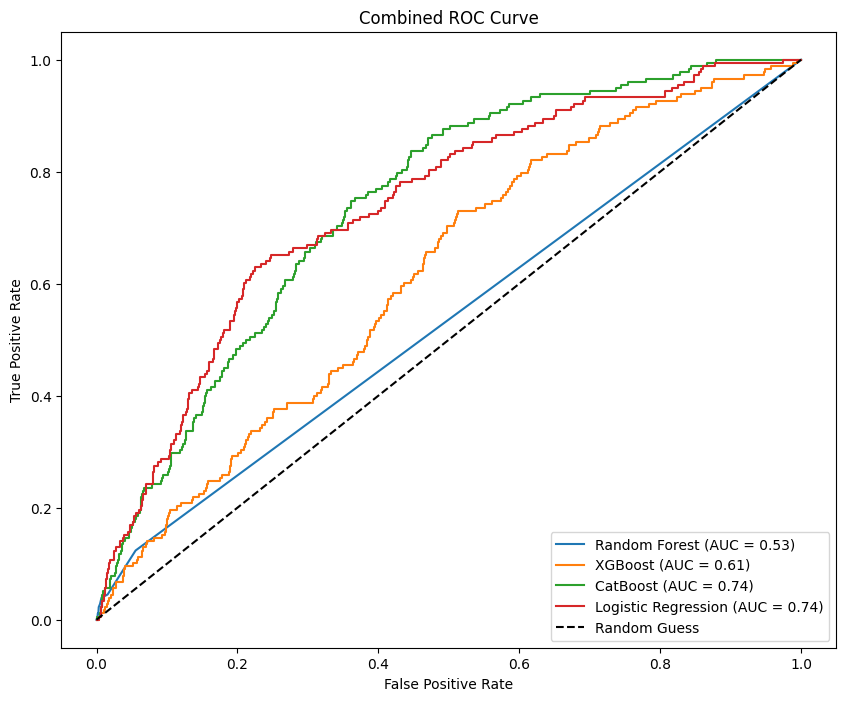


Training Random Forest...
name: Random Forest

Training XGBoost...


c:\Users\JoshL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:04:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


name: XGBoost

Training CatBoost...
name: CatBoost

Training Logistic Regression...


C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (stat

name: Logistic Regression


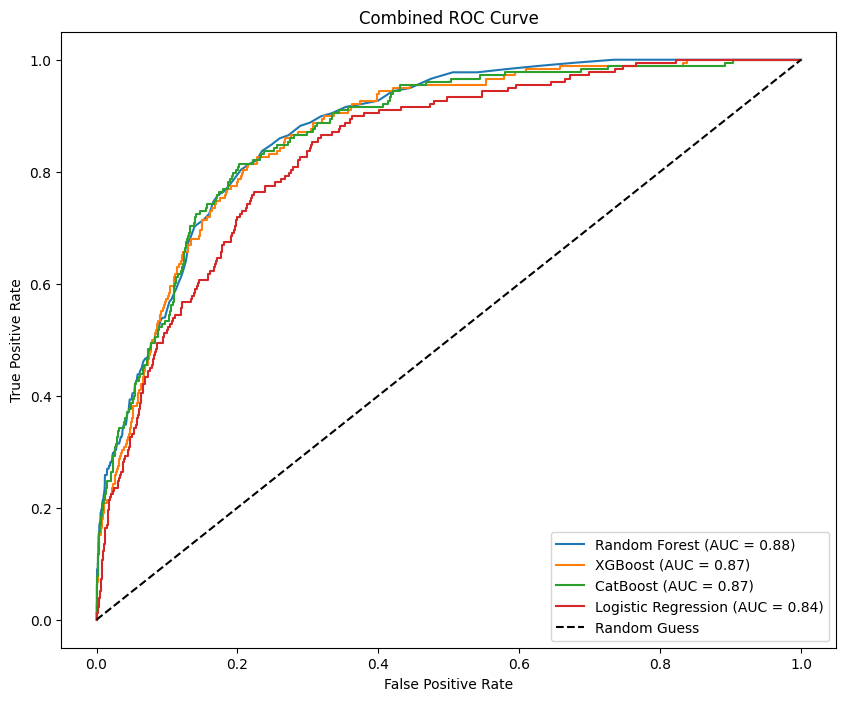


Training Random Forest...
name: Random Forest

Training XGBoost...


c:\Users\JoshL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:04:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


name: XGBoost

Training CatBoost...
name: CatBoost

Training Logistic Regression...


C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (stat

name: Logistic Regression


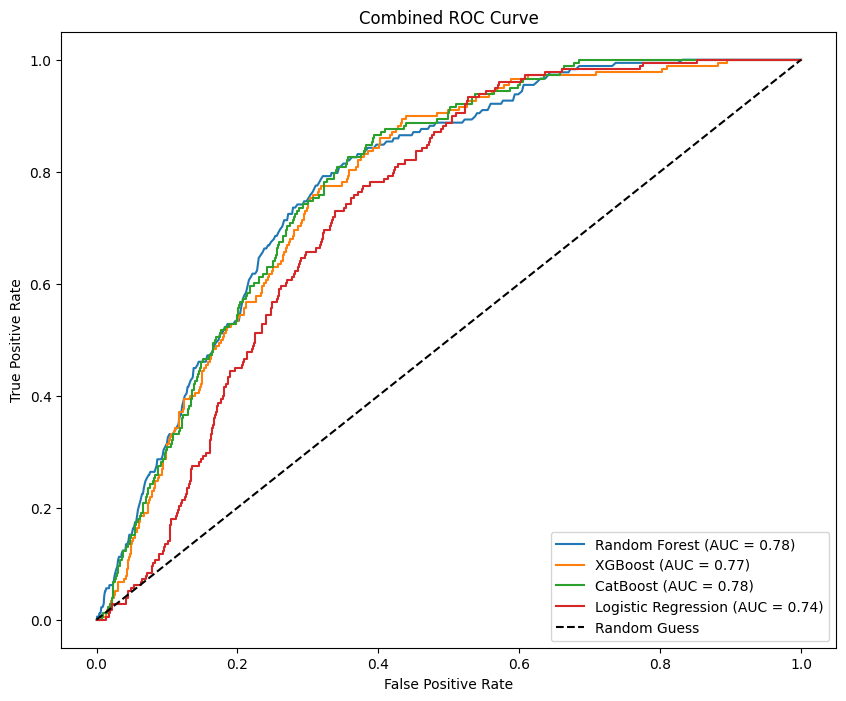


Training Random Forest...
name: Random Forest

Training XGBoost...


c:\Users\JoshL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:05:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


name: XGBoost

Training CatBoost...
name: CatBoost

Training Logistic Regression...


C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (stat

name: Logistic Regression


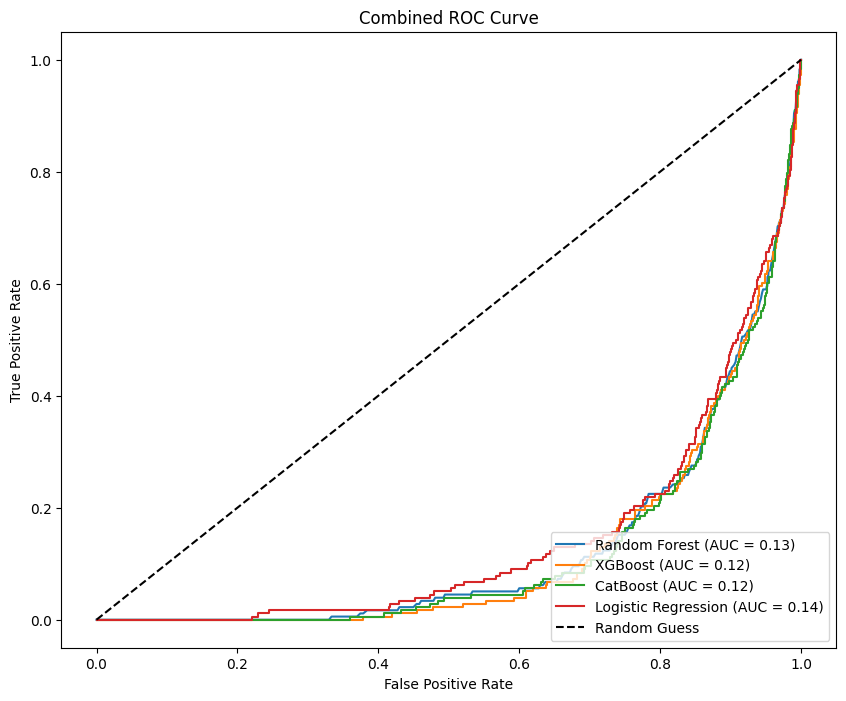

In [12]:
for label in range(4):
    plot_roc(label)

In [4]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=400, random_state=69),
    "XGBoost": xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=4,
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=69),
    "CatBoost": CatBoostClassifier(
        iterations=400,
        depth=8,
        learning_rate=0.1,
        loss_function='MultiClass',
        verbose=False,
        random_state=69),
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        multi_class='ovr',
        class_weight='balanced')
}

In [6]:
X = df.drop(['popularity', 'pop_bucket'], axis=1)
y = df['pop_bucket']

# Identify and label encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

print(f"Categorical columns encoded: {categorical_cols}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Categorical columns encoded: ['artist_name', 'track_name', 'track_id', 'genre', 'decade']


In [7]:
def build_cumulative_curve(model, scale=100):
    # Fit model
    model.fit(X_train, y_train)

    # Get the probability of Y_test records being = 1
    Y_test_probs = model.predict_proba(X_test)[:, 1]

    # Sort these probabilities and the true value in descending order of probability
    order = np.argsort(Y_test_probs)[::-1]
    Y_test_probs_sorted = Y_test_probs[order]
    Y_test_sorted = np.array(y_test)[order]

    # Build the cumulative response curve
    x_cumulative = np.arange(len(Y_test_probs_sorted)) + 1
    y_cumulative = np.cumsum(Y_test_sorted)

    # Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale

    return x_cumulative, y_cumulative

def plot_cumulative_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [0,100], 'k--', label="Random")
    plt.xlabel("Percentage of test instances targeted (decreasing threshold)")
    plt.ylabel("Percentage of population positives targeted (Recall)")
    plt.title("Cumulative response curve")
    plt.legend()

plot_cumulative_curve(models)

KeyboardInterrupt: 

In [ ]:
def plot_lift_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative/x_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [1,1], 'k--', label="Random")
    plt.xlabel("Percentage of test instances (decreasing score)")
    plt.ylabel("Lift (times)")
    plt.title("Lift curve")
    plt.legend()
    plt.grid()
    plt.xlim(0, 10)  # Set x-axis limits to 0-20

plot_lift_curve(models)

## NOTE, might want to focus on left side of plot: plt.xlim(0, 10)